In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.io as sio

%matplotlib inline

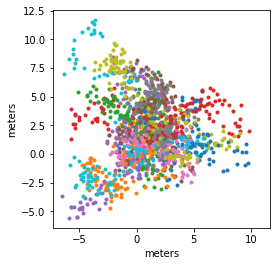

In [2]:
#Plot mouse tracks for each mouse
tmp = sio.loadmat("mousetracks.mat")

tracks = {}
for trackno in range(30):
    tracks[trackno] = tmp["num%d"%(trackno)]
    
plt.close("all")
for trackno in range(30):
    plt.plot(tracks[(trackno)][:,0],tracks[(trackno)][:,1],'.')
plt.axis("square")
plt.xlabel("meters")
plt.ylabel("meters")
plt.show()

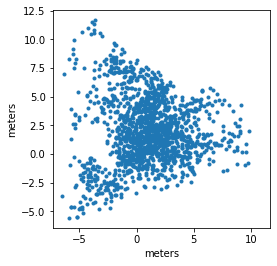

In [3]:
#Plot all possible mouse locations
X = np.zeros([30*50,2])

for trackno in range(30):
    X[(trackno*50):((trackno+1)*50),:] = tracks[trackno]
    
plt.close("all")
plt.plot(X[:,0],X[:,1],'.')
#uncomment to plot your cluster centers
#plt.plot(C[:,0],C[:,1],'ro')
plt.axis("square")
plt.xlabel("meters")
plt.ylabel("meters")
plt.show()

In [22]:
#Get boundaries of mouse locations
leftx = min(X[:,0])
rightx = max(X[:,0])
lefty = min(X[:,1])
righty = max(X[:,1])
print(leftx,rightx,lefty,righty)

-6.521479160053445 9.81852110392891 -5.583196894802413 11.680967663288612


In [112]:
def kmeans(X,K=5,maxiter=100): #Run k-means with 5 cluster centers and 100 center updates
    
    C=[]
    for i in range(K):
        #Randomly initialize centers
        C.append([np.random.uniform(leftx,rightx),np.random.uniform(lefty,righty)])
    
    for iter in range(maxiter):
        # cluster assignment update
        d={}
        for i in range(K):
            d[i]=[0,0,0]
        
        for j in range(len(X)):
            point = X[j]
            index = K
            mini = float('inf')
            for l in range(5):
                distance = (point[0]-C[l][0])**2 + (point[1]-C[l][1])**2
                if distance < mini:
                    mini = distance
                    index = l #cluster index is the closest to the point 
            d[index][0]+=point[0] #Add x-coordinate
            d[index][1]+=point[1] #Add y-coordinate
            d[index][2]+=1 #Count of points assigned to cluster center
        
        for k in range(K):
            # cluster center update
            if d[k][2]==0: #Check for bad initialization
                continue
            C[k][0] = d[k][0]/d[k][2] #Take mean of x coordinates
            C[k][1] = d[k][1]/d[k][2] #Take mean of y coordinates 
            
        if iter == 0 or iter == 49 or iter == 99:
            plt.plot(X[:,0],X[:,1],'.')
            plt.plot([x[0] for x in C],[x[1] for x in C],'ro')
            plt.axis("square")
            plt.title("Iteration " + str(iter+1))
            plt.xlabel("meters")
            plt.ylabel("meters")
            plt.show()
    return C

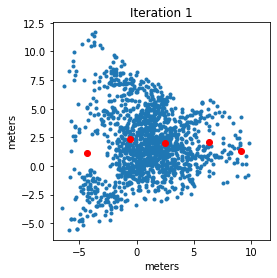

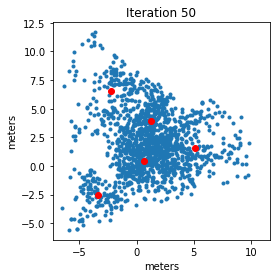

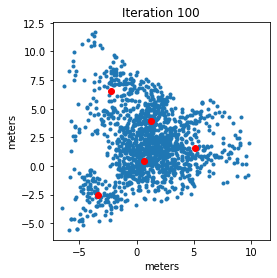

Cluster centers at 100th iteration are:
[-3.402566329960514, -2.52823357319456]
[-2.2030151903379127, 6.552955420615592]
[0.6422737301619507, 0.41183172766701487]
[1.2713499252759504, 3.9258977905652355]
[5.086504098023154, 1.5759716028543613]


In [113]:
C = kmeans(X,K=5,maxiter=100)
print('Cluster centers at 100th iteration are:')
for i in C:
    print(i)

In [114]:
def kmedians(X,K=5,maxiter=100):
    
    C=[]
    for i in range(K):
        #Randomly initialize centers
        C.append([np.random.uniform(leftx,rightx),np.random.uniform(lefty,righty)])
    
    for iter in range(maxiter):
        # cluster assignment update
        d={}
        for i in range(K):
            d[i]=[[],[]]
        
        for j in range(len(X)):
            point = X[j]
            index = K
            mini = float('inf')
            for l in range(5):
                distance = np.abs(point[0]-C[l][0]) + np.abs(point[1]-C[l][1])
                if distance < mini:
                    mini = distance
                    index = l #cluster index is the closest to the point 
            d[index][0].append(point[0]) #Add x-coordinate
            d[index][1].append(point[1]) #Add y-coordinate
        
        for k in range(K):
            # cluster center update
            if len(d[k][0])==0: #Check for bad initialization
                continue
            newx = np.median(d[k][0]) #Get median of x-coordinates
            newy = np.median(d[k][1]) #Get median of y-coordinates
            C[k][0] = newx
            C[k][1] = newy
            
        if iter == 0 or iter == 49 or iter == 99:
            plt.plot(X[:,0],X[:,1],'.')
            plt.plot([x[0] for x in C],[x[1] for x in C],'ro')
            plt.axis("square")
            plt.title("Iteration " + str(iter+1))
            plt.xlabel("meters")
            plt.ylabel("meters")
            plt.show()
            
    return C

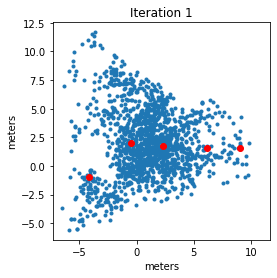

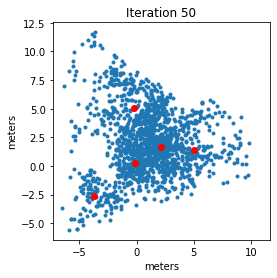

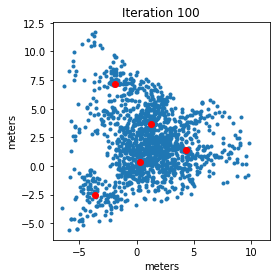

Cluster centers at 100th iteration are:
[-3.6599837172633967, -2.519612793827725]
[-1.9074196228072173, 7.13354473679828]
[0.3263336603885887, 0.37123597415620535]
[1.220150061109964, 3.688354977875796]
[4.299700848275667, 1.4383833109838082]


In [115]:
C = kmedians(X,K=5,maxiter=100)
print('Cluster centers at 100th iteration are:')
for i in C:
    print(i)